In [67]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import shutil

Разработать алгоритм моделирования нормально распреде-
ленного случайного вектора с заданными математическим
ожиданием и корреляционной матрицей.

In [76]:
def GenerateRandomVectors(meanVector, covarianceMatrix, N, savedFileName):
    # Создание матрицы А для получения вектора X
    A = np.zeros((2,2))
    A[0,0] = math.sqrt(covarianceMatrix[0, 0])
    A[1,0] = covarianceMatrix[1, 0] / math.sqrt(covarianceMatrix[0, 0])
    A[1,1] = math.sqrt(covarianceMatrix[1, 1] - covarianceMatrix[0, 1] * covarianceMatrix[0, 1] / covarianceMatrix[0, 0])
    
    # Генерация N двухмерных векторов, каждый элемент из стандартного нормального распределения N(0,1)
    vectorsNorm01 = np.random.randn(2, N)
    
    # Генерация вектора X с сользованием матрицы МА и корреляционной матрицы
    x = np.matmul(A, vectorsNorm01) + np.repeat(meanVector, N, axis=1)
    
    np.save(savedFileName, x)
    shutil.move(savedFileName + ".npy", "./vectors")
    return x

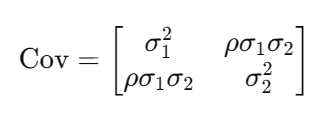

In [59]:
def CalculateCovarianceMatrix(sigma1, sigma2, rho):
    cov_matrix = np.array([[sigma1**2, rho*sigma1*sigma2],
                       [rho*sigma1*sigma2, sigma2**2]])
    print("Ковариационная матрица: \n", cov_matrix)
    return cov_matrix

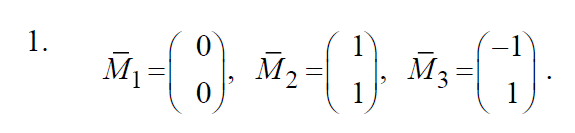

Ковариационная матрица: 
 [[1.  0.7]
 [0.7 1. ]]


Text(0.5, 1.0, 'Выборка вектора X2')

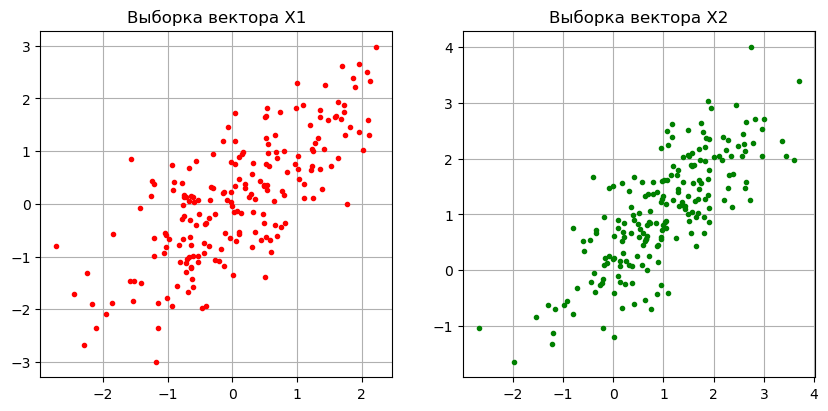

In [77]:
N = 200
M1 = np.array([[0],[0]])  # МА вектора 1
M2 = np.array([[1],[1]])  # МА вектора 2
#B = np.array([[2, 2], [2, 3]])  # ковариационная матрица
B = CalculateCovarianceMatrix(1, 1, 0.7)

x1_1 = GenerateRandomVectors(M1, B, N, "x1_1")
x1_2 = GenerateRandomVectors(M2, B, N, "x1_2")

fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

axes[0].plot(x1_1[0,:], x1_1[1,:], color='red', marker='.', linestyle='none')  # plot saved and loaded data
axes[0].grid(True)
axes[0].set_title('Выборка вектора X1')

axes[1].plot(x1_2[0,:], x1_2[1,:], color='green', marker='.', linestyle='none')  # plot saved and loaded data
axes[1].grid(True)
axes[1].set_title('Выборка вектора X2')

Ковариационная матрица: 
 [[1.  0.7]
 [0.7 1. ]]
Ковариационная матрица: 
 [[1.  2.1]
 [2.1 9. ]]
Ковариационная матрица: 
 [[9.  2.1]
 [2.1 1. ]]


Text(0.5, 1.0, 'Выборка вектора X3')

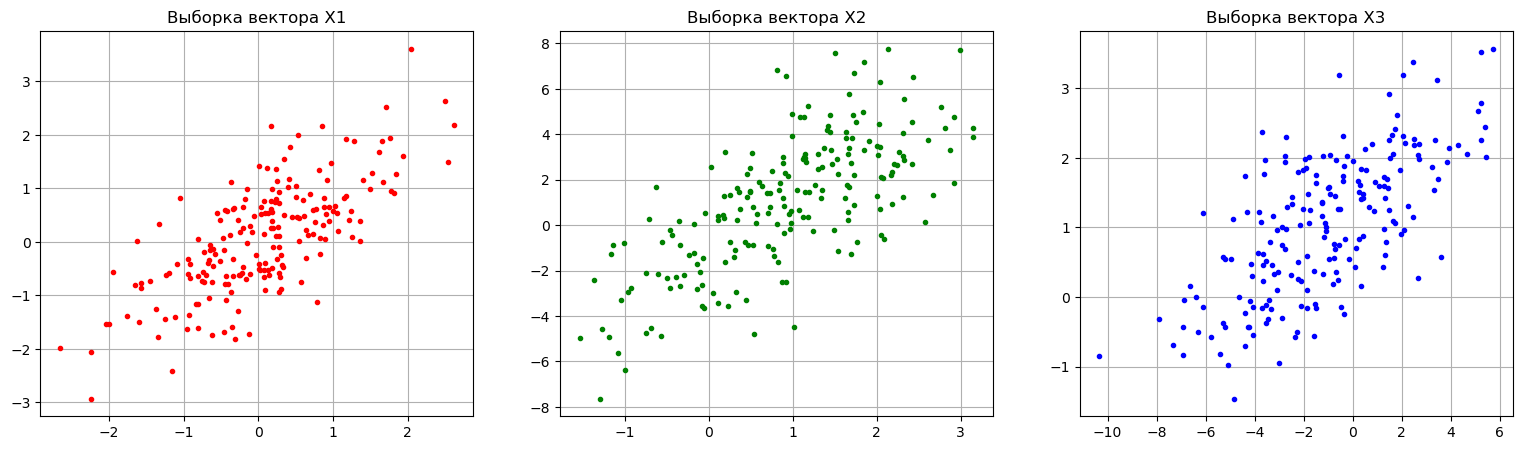

In [78]:
N = 200
M1 = np.array([[0],[0]])  # МА вектора
M2 = np.array([[1],[1]])  # МА вектора
M3 = np.array([[-1],[1]])  # МА вектора
#B = np.array([[2, 2], [2, 3]])  # ковариационная матрица
B1 = CalculateCovarianceMatrix(1, 1, 0.7)
B2 = CalculateCovarianceMatrix(1, 3, 0.7)
B3 = CalculateCovarianceMatrix(3, 1, 0.7)

x2_1 = GenerateRandomVectors(M1, B1, N, "x2_1")
x2_2 = GenerateRandomVectors(M2, B2, N, "x2_2")
x2_3 = GenerateRandomVectors(M3, B3, N, "x2_3")

fig, axes = plt.subplots(1, 3, figsize=(19, 5))

axes[0].plot(x2_1[0,:], x2_1[1,:], color='red', marker='.', linestyle='none')  # plot saved and loaded data
axes[0].grid(True)
axes[0].set_title('Выборка вектора X1')

axes[1].plot(x2_2[0,:], x2_2[1,:], color='green', marker='.', linestyle='none')  # plot saved and loaded data
axes[1].grid(True)
axes[1].set_title('Выборка вектора X2')

axes[2].plot(x2_3[0,:], x2_3[1,:], color='blue', marker='.', linestyle='none')  # plot saved and loaded data
axes[2].grid(True)
axes[2].set_title('Выборка вектора X3')

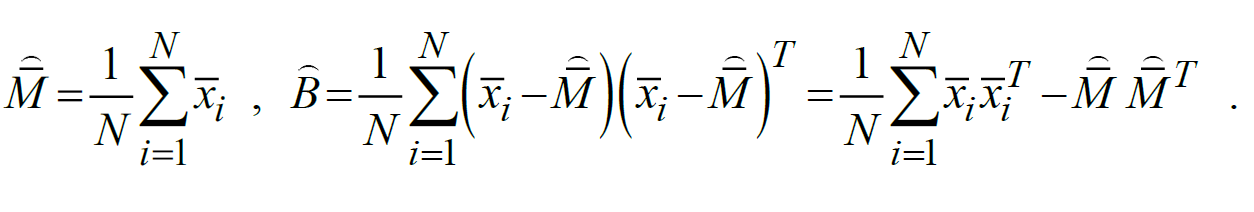

In [62]:
def CalculateParametrs(vector):
    vector_t = vector.T
    n = vector_t.shape[0]  # число наблюдений
    M_hat = 1/n*np.sum(vector_t, axis=0) #axis=0 - сумма компонентам вектора
    
    B_hat = np.zeros((vector_t.shape[1], vector_t.shape[1]))  # инициализация

    for i in range(n):
        B_hat += np.outer(vector_t[i], vector_t[i].T) - np.outer(M_hat, M_hat.T)

    B_hat /= n  # усреднение
    
    return M_hat, B_hat


In [63]:
def printParametrs(param, M, B, vectorName):
    from prettytable import PrettyTable
    print(f"\n----- {vectorName} -----\n")
    table_M = PrettyTable()
    table_M.field_names = ['Оценка математического ожидания вектора M', 'Эталонное значение']
    table_M.add_row([param[0], M])
    table_M.border = False  
    print(f"{table_M}\n")
    
    table_B = PrettyTable()
    table_B.field_names = ['Оценка ковариационной матрицы B', 'Эталонное значение']
    table_B.add_row([param[1], B])
    table_B.border = False  
    print(table_B)
    

In [64]:
printParametrs(CalculateParametrs(x1_1), M1, B,"X1_1")
printParametrs(CalculateParametrs(x1_2), M2, B, "X1_2")
printParametrs(CalculateParametrs(x2_1), M1, B1, "X2_1")
printParametrs(CalculateParametrs(x2_2), M2, B2, "X2_2")
printParametrs(CalculateParametrs(x2_3), M3, B3, "X2_3")



----- X1_1 -----

 Оценка математического ожидания вектора M  Эталонное значение 
          [0.07463164 0.09477773]                  [[0]        
                                                   [0]]        

 Оценка ковариационной матрицы B  Эталонное значение 
     [[0.82912755 0.64075618]         [[1.  0.7]     
     [0.64075618 1.02049523]]         [0.7 1. ]]     

----- X1_2 -----

 Оценка математического ожидания вектора M  Эталонное значение 
          [1.01589726 0.97151406]                  [[1]        
                                                   [1]]        

 Оценка ковариационной матрицы B  Эталонное значение 
     [[0.94879729 0.71312826]         [[1.  0.7]     
     [0.71312826 1.03891853]]         [0.7 1. ]]     

----- X2_1 -----

 Оценка математического ожидания вектора M  Эталонное значение 
          [0.06428376 0.1488526 ]                  [[0]        
                                                   [0]]        

 Оценка ковариационной матрицы B  Эталон